# Negative Binomial

Using all explonatory variables.

In [1]:
# Import utility functions and package dependencies.
%run "./data_prep.ipynb"

## Train/Valid/Test Split

Split the data into 70% training, 20% validation, and 10% test.

In [3]:
df_train, df_valid, df_test = get_data_split()

print("Training data: {} observations".format(len(df_train)))
print("Validation data: {} observations".format(len(df_valid)))
print("Test data: {} observations".format(len(df_test)))

Training data: 522 observations
Validation data: 149 observations
Test data: 75 observations


## Model Creation

Create the Negative Binomial regression model using all explanatory variables.

In [4]:
model_expr = "litter ~ Total_population + Working_Age_population + income_rate + income_count + employment_rate + employment_count + CIF + ALCOHOL + DRUG + SMR + DEPRESS + LBWT + EMERG + Attendance + Attainment + no_qualifications + not_participating + University + crime_count + crime_rate + overcrowded_rate + nocentralheating_rate + drive_petrol + drive_GP + drive_post + drive_primary + drive_retail + drive_secondary + PT_GP + PT_post + PT_retail + broadband"

y_train, X_train = dmatrices(model_expr, df_train, return_type="dataframe")
y_valid, X_valid = dmatrices(model_expr, df_valid, return_type="dataframe")
alpha = 1

model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha=alpha)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 litter   No. Observations:                  454
Model:                            GLM   Df Residuals:                      421
Model Family:        NegativeBinomial   Df Model:                           32
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2324.8
Date:                Wed, 26 Jan 2022   Deviance:                       58.180
Time:                        19:09:22   Pearson chi2:                     57.0
No. Iterations:                     7   Pseudo R-squ. (CS):            0.06972
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.5727      1.223      3.739      0.000       2.176       6.969
Total_population          -0.0004      0.001     -0.333      0.739      -0.003       0.002
Working_Age_population     0.0003      0.001      0.206      0.837      -0.002       0.003
income_rate                0.2773      4.563      0.061      0.952      -8.665       9.220
income_count               0.0028      0.005      0.519      0.603      -0.008       0.013
employment_rate            3.2571      4.992      0.652      0.514      -6.527      13.041
employment_count          -0.0073      0.009     -0.842      0.400      -0.024       0.010
CIF                       -0.0016      0.003     -0.510      0.610      -0.008       0.004
ALCOHOL                 8.651e-06      0.001      0.013      0.990      -0.001       0.001
DRUG                   -6.756e-05      0.000     -0.147      0.883      -0.001       0.001
SMR                        0.0005      0.001      0.479      0.632      -0.002       0.003
DEPRESS                   -0.6833      1.815     -0.376      0.707      -4.241       2.874
LBWT                       0.6031      1.131      0.533      0.594      -1.613       2.820
EMERG                      0.0001      0.003      0.051      0.959      -0.005       0.006
Attendance                -0.6272      0.916     -0.685      0.493      -2.422       1.168
Attainment                 2.9420     15.022      0.196      0.845     -26.501      32.385
no_qualifications          0.0004      0.002      0.202      0.840      -0.003       0.004
not_participating         -0.0610      1.779     -0.034      0.973      -3.549       3.427
University                -0.2776      1.276     -0.218      0.828      -2.779       2.223
crime_count                0.5674      0.925      0.613      0.540      -1.245       2.380
crime_rate                -0.0521      0.078     -0.668      0.504      -0.205       0.101
overcrowded_rate           0.8297      0.946      0.877      0.380      -1.025       2.684
nocentralheating_rate     -0.1856      2.133     -0.087      0.931      -4.366       3.994
drive_petrol              -0.0723      0.050     -1.461      0.144      -0.169       0.025
drive_GP                   0.0096      0.113      0.085      0.933      -0.212       0.231
drive_post                -0.0128      0.120     -0.107      0.915      -0.249       0.223
drive_primary              0.0022      0.068      0.032      0.975      -0.131       0.135
drive_retail               0.0086      0.072      0.118      0.906      -0.133       0.150
drive_secondary            0.0226      0.038      0.590      0.555      -0.053       0.098
PT_GP                     -0.0026      0.040     -0.065      0.948      -0.081       0.076
PT_post                   -0.0161      0.040     -0.398      0.690      -0.095  

## Fit Checking

The model fits the data well as the chi-squared value is greater than the reporter statistic.

In [5]:
df_residuals = 421
pearson_chi2 = 57

chi_sq = scipy.stats.chi2.ppf(.05, df=df_residuals)

print(f"{pearson_chi2} <= {chi_sq}: {pearson_chi2 <= chi_sq}")

57 <= 374.4346690990711: True


## Prediction Visualisations

### Training

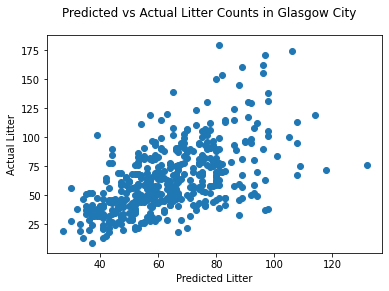

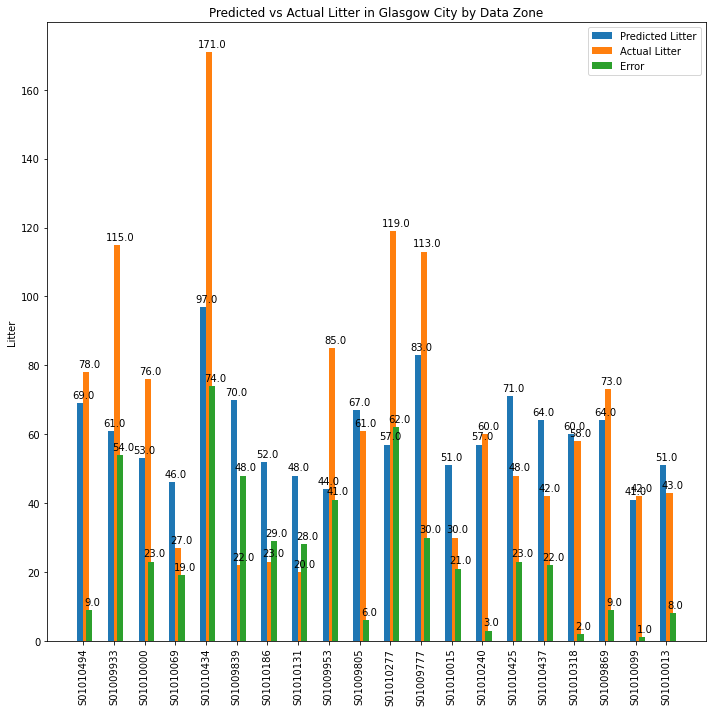

In [6]:
scatter_plot(model, X_train, y_train)
bar_plot(model, X_train, y_train)

## Validation

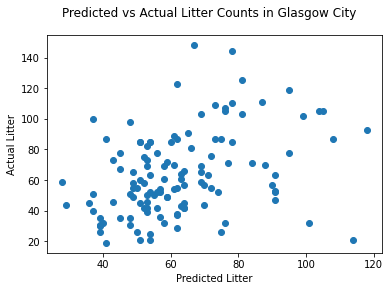

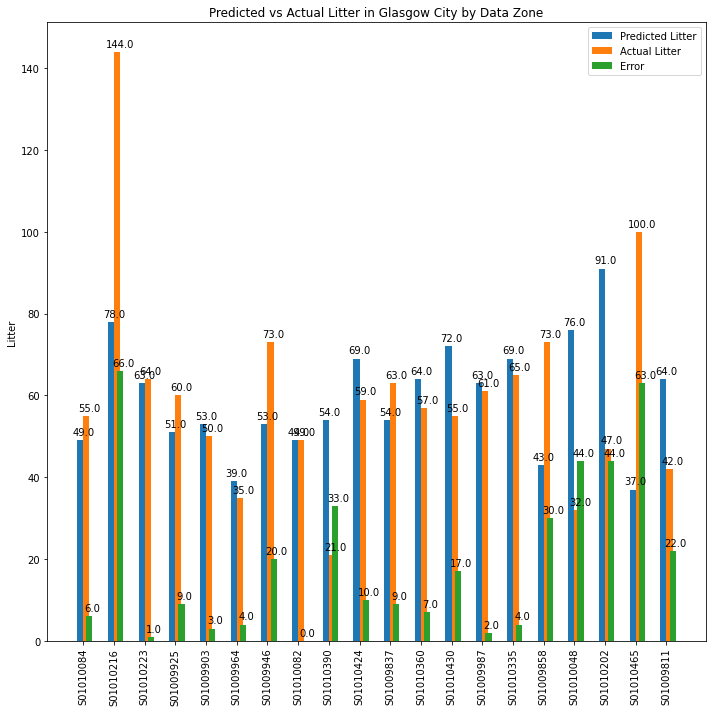

In [7]:
scatter_plot(model, X_valid, y_valid)
bar_plot(model, X_valid, y_valid)